In [208]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [209]:
def potential(x):
    #2*x**2+3*torch.sin(torch.pi*x/2.4)*x*(1-torch.exp(-x/6))
    #x**3/20+torch.sin(torch.pi*x/10)*(20-x)*x+x**2/2
    #-10/x-8*(torch.sin(torch.pi*x/10))**2*torch.exp(-x/15)
    return x*torch.sin(torch.pi*x*2/3)+x**2*2

In [210]:
h_bar=1
m=1
b_lap:float=-h_bar**2/(2*m)
# 控制势函数的大小
l_max=8
scale=10

en_num=120
extend_num=10
epoch=200000
lr=0.01

# 同时对于库伦势函数, 取e=1, 4\pi\epsilon_0=1, E_n=-1/(2n^2)
dtype=torch.float32
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [211]:
La=-40
Lb=40
L=Lb-La  # domain length
N = 3200  # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)
diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag.flatten())
eigenvalues= torch.linalg.eigvalsh(A)
en_3000=eigenvalues[:en_num]
print("Eigenvalues: \n",en_3000)

Eigenvalues: 
 tensor([  1.2885,   3.5610,   5.3071,   6.8324,   8.4537,  10.2409,  12.1547,
         14.1703,  16.2697,  18.4353,  20.6507,  22.8998,  25.1667,  27.4346,
         29.6855,  31.8999,  34.0560,  36.1299,  38.0993,  39.9512,  41.6962,
         43.3748,  45.0404,  46.7313,  48.4622,  50.2350,  52.0481,  53.8995,
         55.7874,  57.7097,  59.6644,  61.6495,  63.6628,  65.7026,  67.7666,
         69.8529,  71.9594,  74.0838,  76.2240,  78.3777,  80.5423,  82.7153,
         84.8939,  87.0751,  89.2557,  91.4320,  93.6002,  95.7555,  97.8932,
        100.0075, 102.0919, 104.1394, 106.1422, 108.0931, 109.9865, 111.8214,
        113.6037, 115.3470, 117.0695, 118.7890, 120.5180, 122.2632, 124.0276,
        125.8120, 127.6167, 129.4412, 131.2855, 133.1488, 135.0305, 136.9303,
        138.8473, 140.7810, 142.7308, 144.6960, 146.6760, 148.6702, 150.6779,
        152.6985, 154.7314, 156.7760, 158.8315, 160.8972, 162.9726, 165.0570,
        167.1495, 169.2495, 171.3561, 173.4686, 1

In [212]:
La=-20
Lb=20
L=Lb-La  # domain length
N = 1600 *5 # number of interior points # 对时间成本来说几乎是平方量级
h :float= L / (N+1)
grid=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
grid=grid[1:-1].unsqueeze(-1)

diag = -2.0 / h**2 * torch.ones(N,device=device) * b_lap
off_diag = 1.0 / h**2 * torch.ones(N - 1,device=device) * b_lap

In [213]:
V_diag=potential(grid)
A = torch.diag(diag) + torch.diag(off_diag,diagonal=1) + torch.diag(off_diag, diagonal=-1)+torch.diag(V_diag.flatten())
eigenvalues= torch.linalg.eigvalsh(A)
en=eigenvalues[:en_num]
print("Eigenvalues: \n",en)

Eigenvalues: 
 tensor([  1.2899,   3.5591,   5.3146,   6.8320,   8.4544,  10.2429,  12.1588,
         14.1785,  16.2806,  18.4495,  20.6706,  22.9236,  25.1956,  27.4683,
         29.7247,  31.9426,  34.1038,  36.1805,  38.1530,  40.0057,  41.7535,
         43.4339,  45.1061,  46.8014,  48.5410,  50.3209,  52.1423,  54.0030,
         55.9005,  57.8330,  59.7984,  61.7954,  63.8214,  65.8720,  67.9495,
         70.0490,  72.1694,  74.3086,  76.4646,  78.6335,  80.8128,  83.0003,
         85.1960,  87.3924,  89.5887,  91.7875,  93.9666,  96.1226,  98.2827,
        100.4014, 102.4967, 104.5678, 106.5706, 108.5214, 110.4184, 112.2510,
        114.0367, 115.7862, 117.5203, 119.2553, 121.0021, 122.7665, 124.5525,
        126.3575, 128.1852, 130.0327, 131.9004, 133.7885, 135.6952, 137.6205,
        139.5640, 141.5244, 143.5011, 145.4952, 147.5034, 149.5273, 151.5642,
        153.6156, 155.6795, 157.7547, 159.8418, 161.9392, 164.0473, 166.1642,
        168.2903, 170.4232, 172.5631, 174.7088, 1

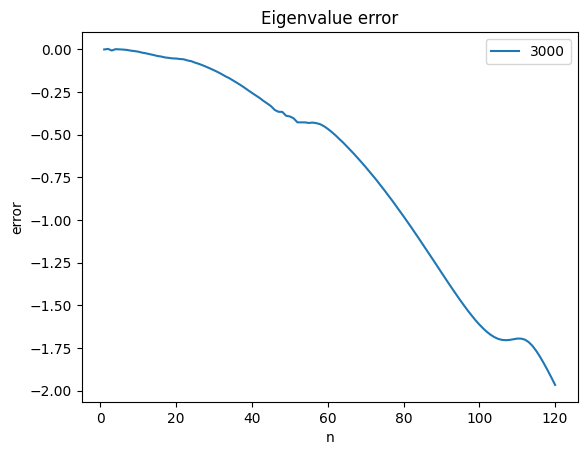

In [214]:
error=en_3000-en
plt.plot(np.arange(1,en_num+1),error.cpu().numpy(),label="3000")
plt.xlabel("n")
plt.ylabel("error")
plt.legend()
plt.title("Eigenvalue error")
# plt.savefig("Eigenvalue_error.png")
plt.show()

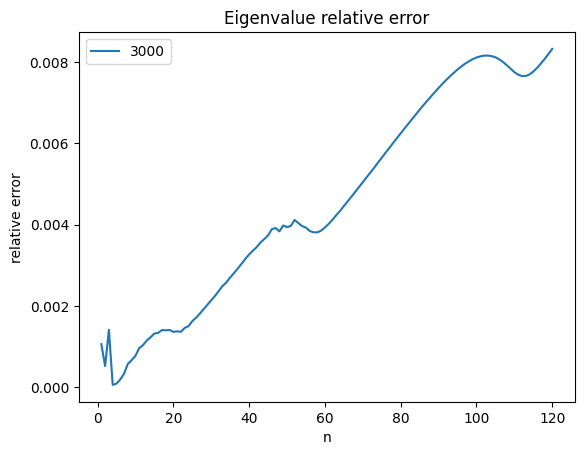

In [215]:
relative_error=abs((en_3000-en)/en_3000)
plt.plot(np.arange(1,en_num+1),relative_error.cpu().numpy(),label="3000")
plt.xlabel("n")
plt.ylabel("relative error")
plt.legend()
plt.title("Eigenvalue relative error")
# plt.savefig("Eigenvalue_relative_error.png")
plt.show()

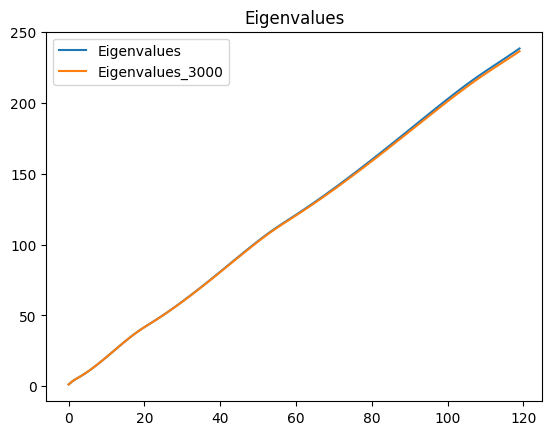

In [216]:
plt.plot(en.cpu(), label='Eigenvalues')
plt.plot(en_3000.cpu(), label='Eigenvalues_3000')
plt.title("Eigenvalues")
plt.legend()
plt.show()

In [217]:
# print(V_diag[750:-750].detach().cpu().numpy())

/tmp/ipykernel_984231/1186928101.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


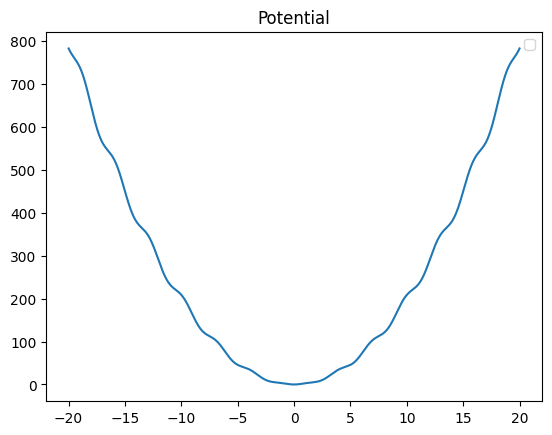

In [218]:
plt.plot(grid.cpu().numpy(),V_diag.cpu().numpy())
plt.title("Potential")
plt.legend()
plt.show()

In [219]:
eigs, eigv = torch.linalg.eigh(A)

# print("Eigenvalues: \n", eigs[:en_num])
# print("Eigenvectors: \n", eigv[:,:en_num])

tensor(1.0000, device='cuda:0')
normalization: tensor(181.1729, device='cuda:0')


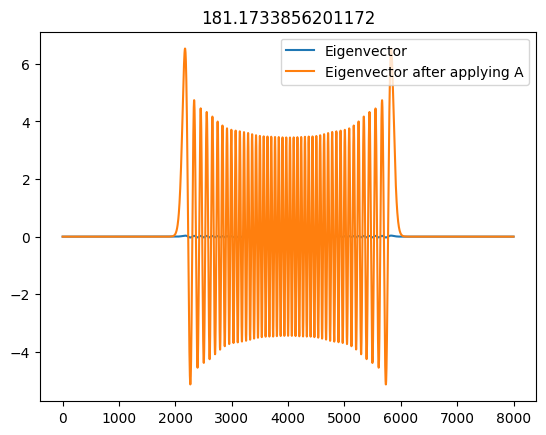

In [220]:
n=90
test_v=eigv[:,n]
test_vt=A@test_v
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
print(torch.norm(test_v))
norm=torch.norm(test_vt)
print('normalization:',norm)

plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.plot(test_vt.detach().cpu().numpy(),label="Eigenvector after applying A")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()

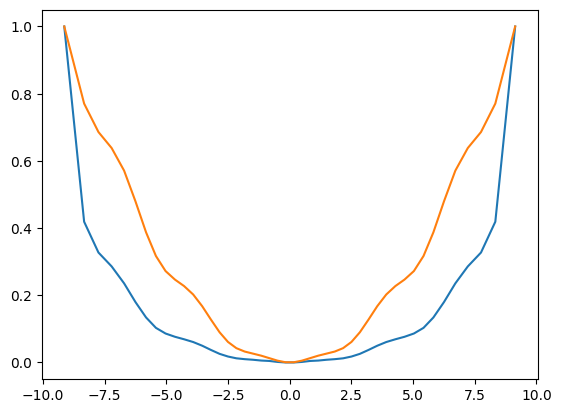

In [221]:
lift_v=[]
x_plot=[]
ave=torch.mean(test_v)
for i in range(1,len(test_v)-1):
    if test_v[i]<ave:continue
    if test_v[i]>test_v[i-1] and test_v[i]>test_v[i+1]:
        lift_v.append(test_v[i].item())
        x_plot.append(grid[i].item())
        
min_v=min(lift_v)       
lift_v=np.array(lift_v)-min_v
x_plot=np.array(x_plot)
poten=potential(torch.Tensor(x_plot)).detach().numpy()

scale=max(lift_v)
scale2=max(poten)
lift_v=lift_v/scale
poten=poten/scale2

plt.plot(x_plot,lift_v)
plt.plot(x_plot,poten)
plt.show()

tensor(1.0000, device='cuda:0')


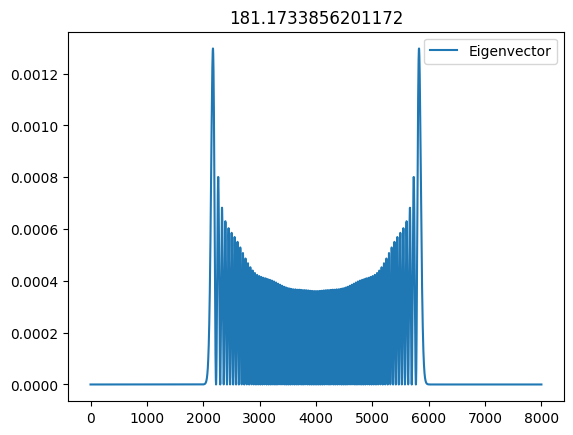

In [222]:
test_v=eigv[:,n]

# r=torch.linspace(La,Lb,N+2,dtype=dtype,device=device)
# R=r[1:-1]
# R=1/R 
# test_v=test_v*R
print(torch.norm(test_v))
test_v=test_v**2
#归一化test_vt
# norm=torch.norm(test_vt)
# test_vt=test_vt/norm
plt.plot(test_v.detach().cpu().numpy(),label="Eigenvector")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()

In [223]:
print(torch.mean(test_v))

tensor(0.0001, device='cuda:0')


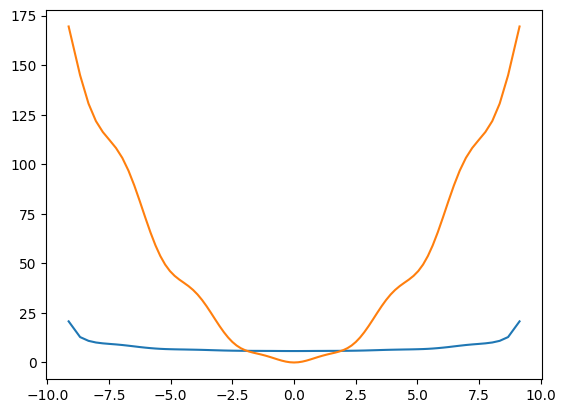

In [224]:
lift_v=[]
x_plot=[]
ave=torch.mean(test_v)
for i in range(1,len(test_v)-1):
    if test_v[i]<ave:continue
    if test_v[i]>test_v[i-1] and test_v[i]>test_v[i+1]:
        lift_v.append(test_v[i].item())
        x_plot.append(grid[i].item())
        
lift_v=np.array(lift_v)
x_plot=np.array(x_plot)
poten=potential(torch.Tensor(x_plot)).detach().cpu().numpy()

# scale=max(lift_v)
# scale2=max(poten)
# lift_v=lift_v/scale
# poten=poten/scale2

plt.plot(x_plot,lift_v*16000)
plt.plot(x_plot,poten)
plt.show()

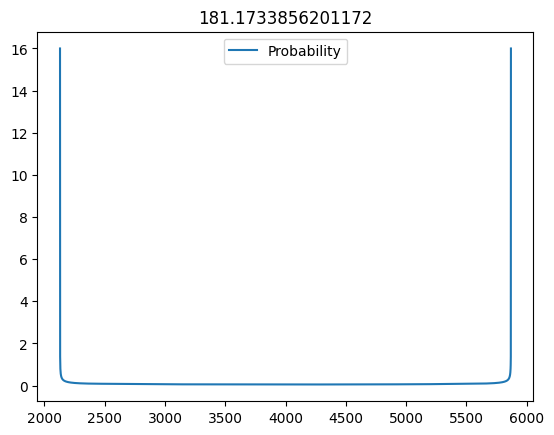

In [225]:
def pro(V,E):
    return 1/torch.sqrt(2*(E-V))
probability=pro(V_diag,eigs[n])
plt.plot(probability.detach().cpu().numpy(),label="Probability")
plt.title(f'{eigs[n]}')
plt.legend()
plt.show()